# Exercise 4.3.4 XOR 2 hidden layers

In this exercise we will implement the same neural network of XOR exercise, adding a second hidden layer

The steps to follow are:
1. Create XOR dataset
2. Plot the dataset
4. Implement the Neural Network (NN) algorithm:
    1. Initialize W's and b's
    2. Implement sigmoid function and forward function
    3. Implement cost and sigmoid derivate functions
    4. Implement backpropagation function
    5. Implement and execute the NN model
    6. Implement prediction, accuracy, and decision boundary functions
    7. Plot the prediction with its decision boundary
    8. Add 3, 4, 5, and 6 neurons to the hidden layers of the NN
5. Write some conclusions according the results obtained, comparing the previous results.
    

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

x= (200, 2) y= (200, 1)


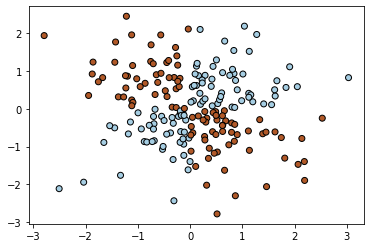

In [2]:
#1. Generating XOR dataset
np.random.seed(1)
X = np.random.randn(200, 2)
#print(X)

y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], c= y, cmap = plt.cm.Paired, edgecolors = 'k' )

y = y.reshape(-1,1)
print('x=', X.shape, 'y=', y.shape)

In [3]:
#2. Implement a function to intialize all the weights

# m, number of features
# nh, number of activation units in the hidden layer
# ny, number of output neurons

def init_w(m, nh, ny):
    np.random.seed(2)
    
    #w´s willbe created randomly
    #b's will be zeros
    W1= np.random.randn(nh, m) * 0.01
    b1= np.zeros((1,nh))
    W2= np.random.randn(nh, nh) * 0.01
    b2= np.zeros((1,nh))
    
    W3 = np.random.randn(ny, nh) * 0.01
    b3= np.zeros((ny,1))
    W = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}
    return W

#Testing the function
m = X.shape[1] # features on x
nh = 2 # hidden neurons
ny = 1 # outputs units

W = init_w(m, nh, ny)
print(W['W1'].shape, 'W1:\n', W['W1'])
print(W['b1'].shape, 'b1:\n', W['b1'])
print(W['W2'].shape, 'W2:\n', W['W2'])
print(W['b2'].shape, 'b2:\n', W['b2'])
print(W['W3'].shape, 'W3:\n', W['W3'])
print(W['b3'].shape, 'b3:\n', W['b3'])

(2, 2) W1:
 [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]]
(1, 2) b1:
 [[0. 0.]]
(2, 2) W2:
 [[-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
(1, 2) b2:
 [[0. 0.]]
(1, 2) W3:
 [[-0.01057952 -0.00909008]]
(1, 1) b3:
 [[0.]]


In [4]:
#Sigmoid function
def sigmoid(z):
    g = 1/(1+ np.exp(-z))
    return g

#Implement forward propagation to calculate ouput probabilites

def forward(x, W):
    W1 = W['W1']
    b1 = W['b1']
    W2 = W['W2']
    b2 = W['b2']
    
    W3 = W['W3']
    b3 = W['b3']
    
    a1 = x
    Z2 = np.dot(a1, W1.T) + b1
    
    a2 = sigmoid(Z2)
    Z3 = np.dot(a2, W2.T) + b2
    
    a3 = sigmoid(Z3)
    Z4 = np.dot(a3, W3.T) + b3

    a4 = sigmoid(Z4)
    Z = {'Z2': Z2, 'a2': a2, 'Z3': Z3, 'a3': a3, 'Z4': Z4, 'a4': a4}
    return a4, Z

In [5]:
#Cost function
def cost(a, y):
    J = 1/2 * np.sum((a - y)**2)
    #J = np.sum((a - y)**2)
    return J

#Derivative of sigmoid function
def d_sigmoid(z):
    ds = sigmoid(z) * (1 - sigmoid(z))
    return ds

In [6]:
#5. Backpropagation algorithm

def backp(W, Z, X, y):
    m = X.shape[1]
    
    W1 = W['W1']
    W2 = W['W2']
    W3 = W['W3']
    
    a2 = Z['a2']
    a3 = Z['a3']
    a4 = Z['a4']
    
    Z2 = Z['Z2']
    Z3 = Z['Z3']
    Z4 = Z['Z4']

    d4 = a4 - y
    d3 = np.dot(d4, W3) * d_sigmoid(Z3)
    d2 = np.dot(d3, W2) * d_sigmoid(Z2)

    dW1 = (1/m) * np.dot(d2.T, X)
    dW2 = (1/m) * np.dot(d3.T, a2)
    dW3 = (1/m) * np.dot(d4.T, a3)
    
    db1 = (1/m) * np.sum(d2, axis = 0)
    db2 = (1/m) * np.sum(d3, axis = 0)
    db3 = (1/m) * np.sum(d4)

    grad = {'dW1': dW1, 'dW2': dW2, 'dW3': dW3, 'db1': db1, 'db2': db2, 'db3': db3}
    return grad

In [7]:
def xor_model(x, y, nh, alpha = 0.001, epochs = 10000):
    np.random.seed(2)
    m = x.shape[1]
    ny = 1
    #1. Initialize W's
    W = init_w(m, nh, ny)
    
    #Initialize forward propagation to calculate initial cost 
    a4, z = forward(x, W)
    print('Initial cost:', cost(a4, y))
    
    J = []
    for i in range(epochs):
        
        #2. Calculate forward propagation
        a4, Z = forward(x, W)
        J.append(cost(a4, y))
        
        #3. Calculate backpropagation
        grad = backp(W, Z, x, y)
        
        #4. Update w's and b's here
        W['W1'] = W['W1'] - alpha * grad['dW1']
        W['W2'] = W['W2'] - alpha * grad['dW2']
        W['W3'] = W['W3'] - alpha * grad['dW3']
        W['b1'] = W['b1'] - alpha * grad['db1']
        W['b2'] = W['b2'] - alpha * grad['db2']
        W['b3'] = W['b3'] - alpha * grad['db3']
        
        
    print('Final cost:', J[epochs-1])
    return W, J

Initial cost: 25.000598813830823
Final cost: 17.320707318722057
W1 = [[ -2.66326566 -30.85402229]
 [ 26.54266515  -0.39782528]]
b1 =  [[-1.59625153  0.60215403]]
W2 =  [[-23.76242069 -21.75357653]
 [-15.858711   -15.14156592]]
b2 =  [[ 6.496712   -0.13540198]]
W3 =  [[13.85042722  7.17542876]]
b3 =  [[-0.63489869]]


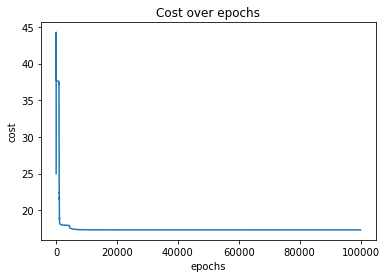

In [19]:
# Now call your model with 2 neurons on hidden layer, alpha 0.1 and 6000 epochs

W, J = xor_model(X, y, nh, alpha= 0.1, epochs=100000)


print('W1 =', W['W1'])
print("b1 = ", W['b1'])
print("W2 = ", W['W2'])
print("b2 = ", W['b2'])
print("W3 = ", W['W3'])
print("b3 = ", W['b3'])

#5. Plot Cost
plt.plot(J)
plt.title('Cost over epochs')
plt.xlabel('epochs')
plt.ylabel('cost');

In [15]:
def predict(x, W):
    
    a4, Z = forward(x, W)
    y_hat = list(map(lambda x: 1 if x > 0.5 else 0, a4))
    y_hat = np.array(y_hat)
    y_hat = y_hat.reshape(-1, 1)
    
    return y_hat

def accuracy(y_hat, y):
    
    m = len(y)
    tptn = (y == y_hat).sum()
    acc = tptn / m
    
    return acc

def decision_boundary(x, y, w, ax):
    
    #Minimos y maximos de la gráfica
    x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    h = 0.01
    
    #Matriz para graficar una superficie
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    #Valores para que dar color a la superficie dependiendo de las predicciones
    Z1 = predict(np.c_[xx.ravel(), yy.ravel()], w)
    
    #Convertir en matriz el vector de predicciones
    Z1 = Z1.reshape(xx.shape)
    
    #Graficar la superficie
    ax.contourf(xx, yy, Z1, cmap =plt.cm.tab20c)
    ax.scatter(x[:, 0], x[:, 1], c = y.squeeze(), cmap=plt.cm.tab20c)

Text(0, 0.5, 'x2')

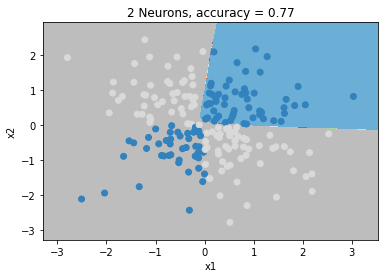

In [16]:
#Plot the XOR function and its decision boundary

y_hat = predict(X, W)
acc = accuracy(y_hat, y)
ax = plt.subplot()
decision_boundary(X, y, W, ax)
ax.set_title('2 Neurons, accuracy = ' + str(acc))
ax.set_xlabel('x1')
ax.set_ylabel('x2')

Initial cost: 25.000048976245417
Final cost: 1.2082594242149137e-05
Initial cost: 25.000896777884194
Final cost: 4.70786904181979e-05
Initial cost: 25.00038521816116
Final cost: 1.0649808660103882e-05
Initial cost: 25.000053491254256
Final cost: 15.756629814024139


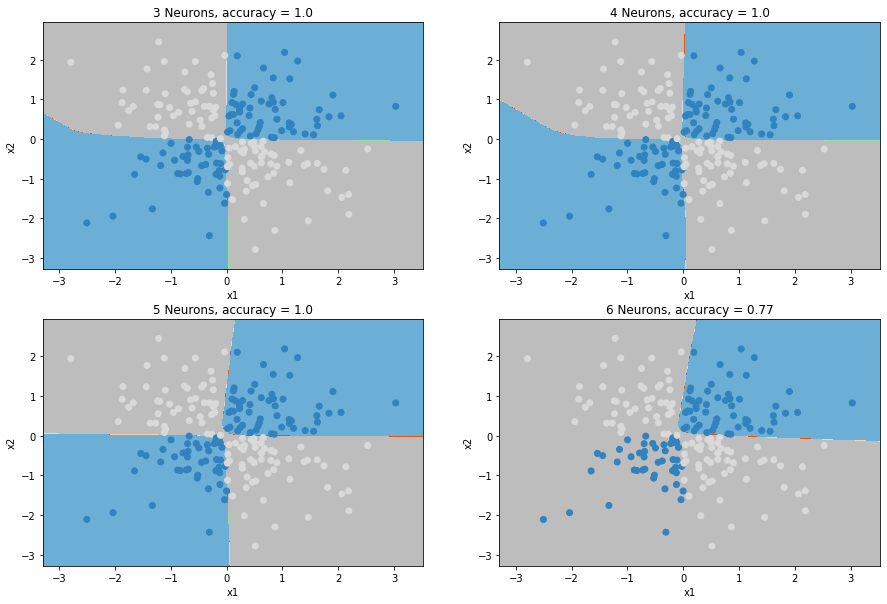

In [17]:
hidden = [3,4,5,6]
axi = 1
f, axa = plt.subplots(2,2, figsize = (15,10))

for h in hidden:
    W, J = xor_model(X, y, h, alpha = 0.04, epochs = 40000)
    y_hat = predict(X, W)
    acc = accuracy(y_hat, y)
    
    ax = plt.subplot(2, 2, axi)
    axi = axi +1
    decision_boundary(X, y, W, ax)
    ax.set_title( str(h)+' Neurons, accuracy = ' + str(acc))
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')